In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

In [5]:
# Loading the dataset

fc = pd.read_csv('forest_dataset.csv')
fc



,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3088,217,21,295,53,2912,194,254,190,1590,...,0,0,0,0,0,0,0,0,0,2
9996,2569,129,10,0,0,1273,237,234,127,5094,...,0,0,0,0,0,0,0,0,0,2
9997,2693,21,11,30,6,2316,212,216,139,2110,...,0,0,0,0,0,0,0,0,0,2
9998,2536,42,11,277,19,323,222,216,128,2844,...,0,0,0,0,0,0,0,0,0,2


In [8]:
fc.describe()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,2960.645900,154.127600,13.98120,269.502800,45.596800,2358.805400,212.382200,223.886000,142.892300,1982.005000,...,0.092300,0.078300,0.002000,0.002900,0.000300,0.000500,0.024000,0.02130,0.012300,2.034100
std,276.101899,111.112044,7.44313,214.741609,57.607363,1564.814207,26.560675,19.443395,37.460182,1307.685368,...,0.289463,0.268657,0.044679,0.053776,0.017319,0.022356,0.153057,0.14439,0.110227,1.378016
min,1866.000000,0.000000,0.00000,0.000000,-147.000000,0.000000,70.000000,88.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,2819.000000,57.000000,9.00000,108.000000,6.000000,1106.750000,199.000000,213.000000,120.000000,1041.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
50%,2996.000000,128.000000,13.00000,218.000000,29.000000,2008.000000,218.000000,227.000000,143.000000,1719.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000
75%,3162.000000,254.000000,18.00000,390.000000,68.000000,3330.250000,231.000000,238.000000,167.000000,2542.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000
max,3846.000000,359.000000,57.00000,1370.000000,573.000000,7023.000000,254.000000,254.000000,247.000000,7080.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,7.000000


In [9]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       10000 non-null  int64
 1   1       10000 non-null  int64
 2   2       10000 non-null  int64
 3   3       10000 non-null  int64
 4   4       10000 non-null  int64
 5   5       10000 non-null  int64
 6   6       10000 non-null  int64
 7   7       10000 non-null  int64
 8   8       10000 non-null  int64
 9   9       10000 non-null  int64
 10  10      10000 non-null  int64
 11  11      10000 non-null  int64
 12  12      10000 non-null  int64
 13  13      10000 non-null  int64
 14  14      10000 non-null  int64
 15  15      10000 non-null  int64
 16  16      10000 non-null  int64
 17  17      10000 non-null  int64
 18  18      10000 non-null  int64
 19  19      10000 non-null  int64
 20  20      10000 non-null  int64
 21  21      10000 non-null  int64
 22  22      10000 non-null  int64
 23  23      1000

In [16]:
# Splitting the dataset into features and target variable
y = fc.iloc[:, -1] - 1 # Adjusting target to start from 0 because last column is the target variable
X = fc.iloc[:, :-1] # Features are all columns except the last one

X.columns = [f'feature_{i}' for i in range(X.shape[1])]

X

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,0
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,0
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,0
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,0
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3088,217,21,295,53,2912,194,254,190,1590,...,1,0,0,0,0,0,0,0,0,0
9996,2569,129,10,0,0,1273,237,234,127,5094,...,0,0,0,0,0,0,0,0,0,0
9997,2693,21,11,30,6,2316,212,216,139,2110,...,0,0,0,0,0,0,0,0,0,0
9998,2536,42,11,277,19,323,222,216,128,2844,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y

0       1
1       0
2       1
3       0
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: 54, Length: 10000, dtype: int64

In [19]:
print(X.isnull().sum().sum())  # Check for missing values

0


In [20]:
# Splitting numerical and categorical features
num_features = X.iloc[:, :10]  # First 10 columns are numerical
cat_features = X.iloc[:, 10:]  # Remaining are binary

# Scaling numerical features
scaler = StandardScaler()
num_features_scaled = scaler.fit_transform(num_features)
num_features_scaled = pd.DataFrame(num_features_scaled, columns=num_features.columns)

# Combining scaled numerical and categorical features
X_processed = pd.concat([num_features_scaled, cat_features], axis=1)

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       738
           1       0.80      0.84      0.82       975
           2       0.73      0.84      0.78       118
           3       1.00      0.40      0.57        10
           4       0.71      0.15      0.25        33
           5       0.76      0.48      0.59        60
           6       0.96      0.76      0.85        66

    accuracy                           0.79      2000
   macro avg       0.82      0.61      0.66      2000
weighted avg       0.79      0.79      0.79      2000



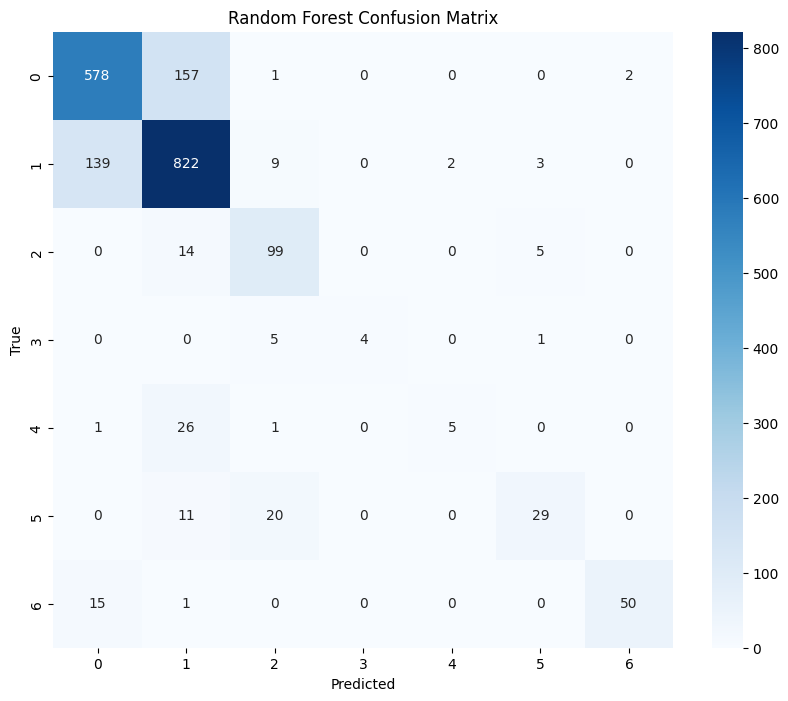

In [23]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

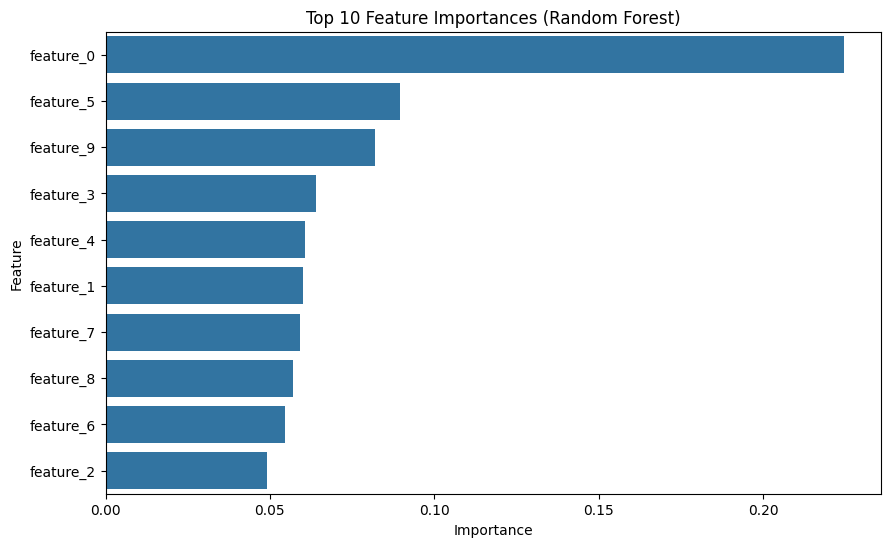

In [24]:
# Feature importance
importances = rf.feature_importances_
feature_names = X_processed.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

Training an XGBoost model for comparison.

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       738
           1       0.80      0.84      0.82       975
           2       0.77      0.82      0.80       118
           3       0.83      0.50      0.62        10
           4       0.75      0.36      0.49        33
           5       0.73      0.60      0.66        60
           6       0.91      0.80      0.85        66

    accuracy                           0.79      2000
   macro avg       0.80      0.67      0.72      2000
weighted avg       0.79      0.79      0.79      2000



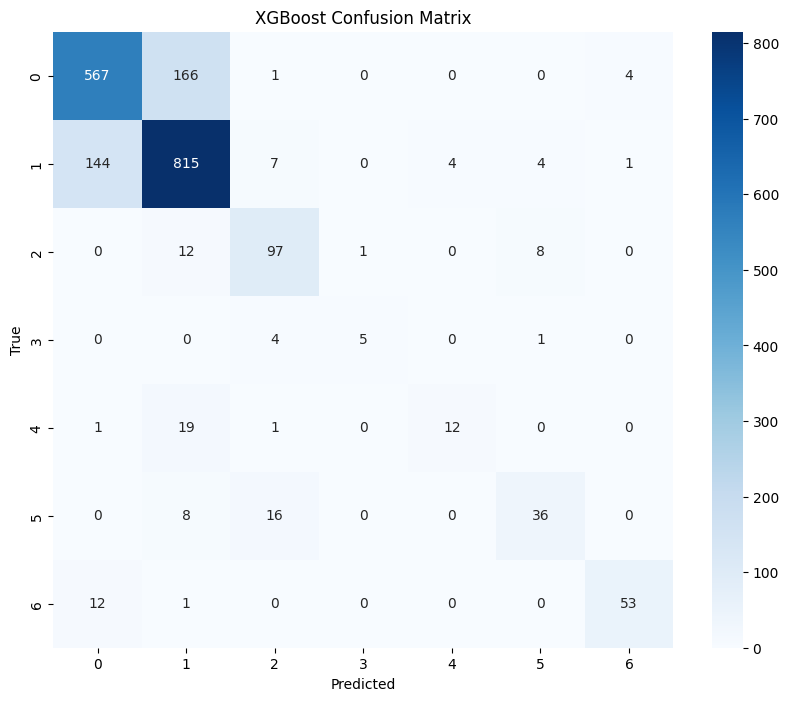

In [29]:
# Train XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Performing hyperparameter tuning

In [33]:
from sklearn.model_selection import GridSearchCV

# Subsample data for faster tuning
subset_size = 6000  # Must be less than len(X_train)
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=subset_size, random_state=42, stratify=y_train)

# Random Forest tuning
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, n_jobs=-1)
rf_grid.fit(X_train_subset, y_train_subset)
print("Best Random Forest Parameters:", rf_grid.best_params_)

# XGBoost tuning
xgb_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6]
}
xgb_grid = GridSearchCV(xgb.XGBClassifier(objective='multi:softmax', num_class=7, random_state=42), xgb_param_grid, cv=3, n_jobs=-1)
xgb_grid.fit(X_train_subset, y_train_subset)
print("Best XGBoost Parameters:", xgb_grid.best_params_)

Best Random Forest Parameters: {'max_depth': None, 'n_estimators': 100}
Best XGBoost Parameters: {'max_depth': 6, 'n_estimators': 100}
